In [1]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)
i=0
A=np.zeros((len(x)*len(y),2))
for row in range(len(x)):
    for col in range(len(y)):
        A[i,0]=x[row]
        A[i,1]=y[col]
        i+=1
A

array([[-10. , -10. ],
       [-10. ,  -9.9],
       [-10. ,  -9.8],
       ...,
       [  9.9,   9.7],
       [  9.9,   9.8],
       [  9.9,   9.9]])

In [3]:
x = np.arange(-10, 10, 0.1)
y=np.sin(x)

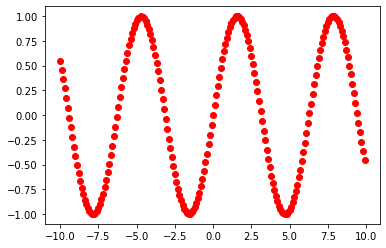

In [4]:
fig = plt.figure()
plt.scatter(x, y, c='r')
plt.show()

In [5]:
Z = (np.sin(A[:,0])/A[:,0])*(np.sin(A[:,1])/A[:,1])

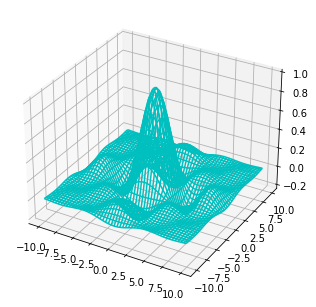

In [6]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(A[:,0].reshape(len(x),len(x)), A[:,1].reshape(len(x),len(x)), Z.reshape(len(x),len(x)),color = 'c')
plt.show()

In [7]:
kernel = RBF(length_scale=0.1)
gp =  GaussianProcessRegressor(kernel=kernel,alpha=0.01,normalize_y=True)

In [8]:
y.shape

(200,)

In [9]:
gp.fit(A,Z)

KeyboardInterrupt: 

In [10]:
z_pred= gp.predict(A)

MemoryError: Unable to allocate 11.9 GiB for an array with shape (40000, 40000) and data type float64

In [ ]:
gp.fit(x.reshape(200,1), y.reshape(200,1))

In [ ]:
y_pred= gp.predict(x)

In [ ]:
y_pred.shape

ValueError: x and y must be the same size

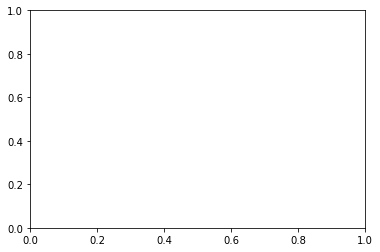

In [77]:
fig = plt.figure()
plt.scatter(x,y_pred , c='c')
plt.show()

In [49]:
X_ = np.linspace(X.min(), X.max() + 30, 1000)[:, np.newaxis]
y_pred, y_std = gp.predict(X_, return_std=True)

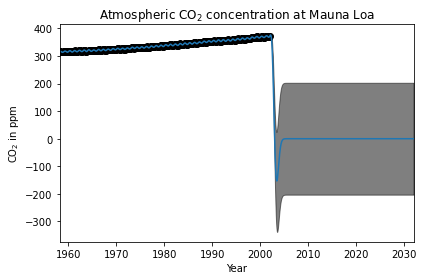

In [50]:
plt.scatter(X, y, c='k')
plt.plot(X_, y_pred)
plt.fill_between(X_[:, 0], y_pred - y_std, y_pred + y_std,
                 alpha=0.5, color='k')
plt.xlim(X_.min(), X_.max())
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.title(r"Atmospheric CO$_2$ concentration at Mauna Loa")
plt.tight_layout()
plt.show()

In [25]:
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
X, y = load_iris(return_X_y=True)
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(X, y)

In [39]:
import numpy as np

from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
    import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared

In [41]:
def load_mauna_loa_atmospheric_co2():
    ml_data = fetch_openml(data_id=41187, as_frame=False)
    months = []
    ppmv_sums = []
    counts = []

    y = ml_data.data[:, 0]
    m = ml_data.data[:, 1]
    month_float = y + (m - 1) / 12
    ppmvs = ml_data.target

    for month, ppmv in zip(month_float, ppmvs):
        if not months or month != months[-1]:
            months.append(month)
            ppmv_sums.append(ppmv)
            counts.append(1)
        else:
            # aggregate monthly sum to produce average
            ppmv_sums[-1] += ppmv
            counts[-1] += 1

    months = np.asarray(months).reshape(-1, 1)
    avg_ppmvs = np.asarray(ppmv_sums) / counts
    return months, avg_ppmvs

X, y = load_mauna_loa_atmospheric_co2()

In [44]:
X.shape

(521, 1)

In [45]:
y.shape

(521,)